In [38]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

### Реализовать оптимизацию методом градиентного спуска для x^2(np.sin(0,5_x)^2+1). Какие параметры шага и количества итераций оптимальны? При каких значениях шага оптимизиция не выходит из локальных минимумов? Подробные условия смотрите в .ipynb файле, приложенном к материалам.

In [64]:
x = np.linspace(-20, 20, 1000)
def func2(_x): return (_x**2)*(np.sin(0.5*_x)**2+1)
def grad2(_x): return 2*_x*(np.sin(0.5*_x)**2+1)+(_x**2)*(np.sin(0.5*_x))*(np.cos(0.5*_x))

In [65]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [66]:
x0=np.random.uniform(-20, 20)
print('true grad', grad2(x0))
print('method1', calculate_grad(func2, x0))
print('method2', calculate_grad2(func2, x0))

true grad -84.99773728746572
method1 -85.32552098238853
method2 -84.99565973564245


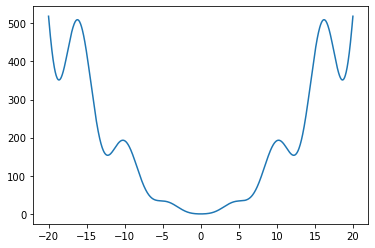

In [67]:
plt.plot(x, func2(x))
plt.show()

In [88]:
x0=np.random.uniform(-20, 20)
alpha=0.1
n_iter=400
for x in range(n_iter):
    if (x % 10 == 0) or (x == n_iter - 1):
        print(x, x0, func2(x0))
        x0-=alpha*grad2(x0)

0 12.409739741206984 154.9442504053589
10 11.11374548715026 177.99200375339296
20 14.043345407880489 286.58535947911975
30 0.14449570327017547 0.020987802020139158
40 0.11529565656810643 0.013337216058209499
50 0.09208351623652722 0.00849733621041391
60 0.07358881466085394 0.005422641740761864
70 0.05883122804646145 0.0034641073562488196
80 0.04704462909014561 0.0022144214607764637
90 0.037625294248491925 0.0014161637334491569
100 0.030094909868477817 0.0009059086592669519
110 0.02407320249653421 0.0005796030349750577
120 0.01925716701027219 0.0003708728604938635
130 0.015405019511463813 0.00023732870542808856
140 0.012323650036371111 0.00015187811644866181
150 0.00985873287048053 9.719697549060314e-05
160 0.007886890475975185 6.220400867960321e-05
170 0.006309463322304134 3.980972360982409e-05
180 0.005047545540419174 2.5477878260763875e-05
190 0.004038023572383126 1.630570083945953e-05
200 0.0032304122736663255 1.0435590683076532e-05
210 0.00258432644782023 6.678754340299568e-06
220 

Можно сделать вывод, что с шагом alpha = 0.1 примерно после 350 итераций происходит незначительное изменение показателей. Соответственно, дынные параметры оптимальны, исходя из метода подбора. Шаг менее 0.1 приводит к большему количеству итераций, что в данном случае является излишним (минимум функции с данным шагом не будет пропущен).

In [89]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
        return x0
opt1=optimizer(alpha, 100)
x=opt1.fit(func2, grad2, np.random.uniform(-20, 20))
print(x, func2(x))

-3.4637072310299034e-11 1.199726778228884e-21


При данных значениях шага оптимизиция не выходит из локальных минимумов.